<h1><center> DSAI 2201- Assignment I: Data Analysis </center></h1>
<h3><center> Due Date: 02 November 2023 10:00 PM </center></h3>
<h3><center> (50 points total) </center></h3>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

- NAME: Almabrouk Ben-Omran
- STUDENT_ID: 60104920
- SECTION: 4
- INSTRUCTOR: Dr. Somaiyeh Mahmoudzadeh

## Assignment 1 - Data Analysis
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(5 points)_
* Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)

**Question 4.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 5.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.

# **To begin with, I will start with exploring the data first before solving. This will allow me to identify all the missing values in the dataset:**

In [17]:
#Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Read data from train.csv dataset + create a copy of the data to refer back to the original data if needed

data = pd.read_csv("train.csv", index_col = 0)
data_copy = data.copy()

In [19]:
#Display first 10 rows
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [20]:
#Discovering more information regarding the dataset columns such as their data types and non-null values

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [21]:
#Identify the number of missing values in each column

data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
# The sum of all missing values in the dataset

data.isnull().sum().sum()

866

In [23]:
# Dropping the unnecessary columns from the dataset

data = data.drop(['Ticket', 'Cabin'], axis= 1)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S


## Q1:

## Finding the number of people who survived and number of people who died:

In [24]:
#Number of people who survived + number of people who died regardless of being male or female

data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [25]:
#Number of people who survived represented as 1

data[data['Survived']==1].count()['Survived']

342

In [26]:
#Number of people who died represented as 0

data[data['Survived']==0].count()['Survived']

549

In [27]:
#Percentage of people who survived = number of people who survived / total number of people

round(data[data['Survived']==1].count()['Survived'] / data.count()['Survived'] * 100, 3)

38.384

In [28]:
#Percentage of dead people = number of dead people / total number of people

round(data[data['Survived']==0].count()['Survived'] / data.count()['Survived'] * 100, 3)

61.616

# Now I will examine the 'Sex' column and the 'Survived' column to determine if a relation exists between a passenger's gender and whether they survived or not:

In [29]:
#Number of male and female passengers that died.

dead_passengers_by_gender = data[data['Survived']==0].groupby('Sex').count()['Survived']
dead_passengers_by_gender

Sex
female     81
male      468
Name: Survived, dtype: int64

In [30]:
#Number of male and female passengers that survived.

survived_passengers_by_gender = data[data['Survived']==1].groupby('Sex').count()['Survived']
survived_passengers_by_gender

Sex
female    233
male      109
Name: Survived, dtype: int64

/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: xlabel='Sex', ylabel='count'>

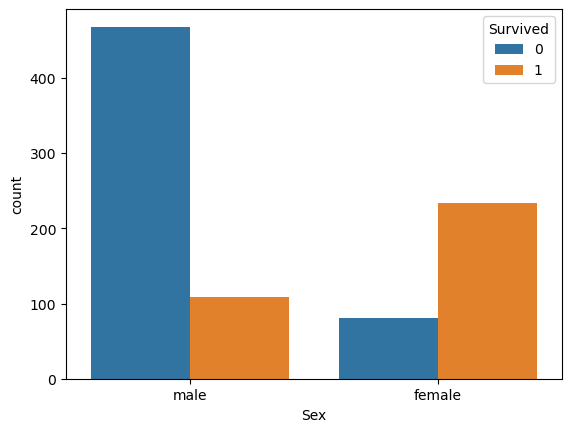

In [31]:
#Constructing a clustered bar chart to compare the number of dead passengers and the passengers who survived based on gender.

gender_clustered_barchart = sns.countplot(x = "Sex", hue = "Survived", data = data)
gender_clustered_barchart

**Based on the conducted analysis, we have determined that female passengers have a higher statistical chance of surviving compared to male passengers based on the clustered barchart. Additionally, we have also identified that the number of male passengers on the titanic was 577 out of 891 passengers in total and only 109 of them survived out of the 577. On the other hand, while the number of female passengers on the titanic was 314 out of 891 passengers in total and 233 of them survived out of 314. Therefore, we can conclude that females have a higher chances of surviving than males.**

# Now I will examine the 'Pclass' column and the 'Survived' column to determine if a relation exists between a passenger's class on the titanic and whether they survived or not:

In [32]:
#First of all, let's begin with checking the number of passengers per class.

num_of_passengers_per_class = data[['Pclass','Survived']].groupby(['Pclass']).count()
num_of_passengers_per_class

,Survived
Pclass,
1,216
2,184
3,491


In [33]:
#Finding the number of passengers who survived based on their classes in order to compare which class had the highest chance of surviving.

num_of_survived_passengers_per_class = data[['Pclass','Survived']].groupby(['Pclass']).sum()
num_of_survived_passengers_per_class

,Survived
Pclass,
1,136
2,87
3,119


In [34]:
#Average of passengers who survived per class

round(data[data['Survived']==1].groupby('Pclass').count()['Survived'] / data["Pclass"].value_counts() * 100, 3)

Pclass
1    62.963
2    47.283
3    24.236
dtype: float64

/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: xlabel='Pclass', ylabel='count'>

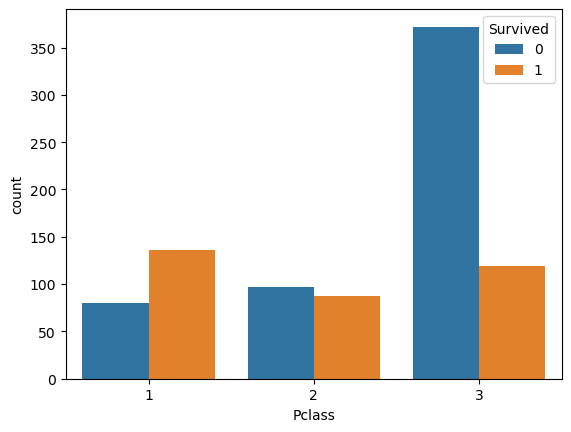

In [35]:
#Constructing a clustered barchart to visualize the number of dead passengers and the passengers who survived based on their class.

pclass_clustered_barchart = sns.countplot(x = "Pclass", hue = "Survived", data = data)
pclass_clustered_barchart

- First class had 216 passengers out of 891 total passengers, with 136 of them surviving (62.9%). This means that passengers in first class had the highest survival rate out of the three classes.

- Second class had 184 passengers out of 891 total passengers, with 87 of them surviving (47.3%). This indicates that second class passengers had the second highest survival rate out of the three classes.

- Third class had 491 passengers out of 891 total passengers, with 119 of them surviving (24.23%). Therefore, third class passengers had the lowest survival rate out of the three classes.

# Now I will examine the 'Age' column and the 'Survived' column to determine if a relation exists between a passenger's age and whether or not they survived:

In [36]:
#Finding the number of passengers who survived based on their age.

num_of_survived_passengers_by_age = data[['Survived', 'Age']].groupby('Age').count()
num_of_survived_passengers_by_age

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,2
70.50,1
71.00,2


In [37]:
#Checking all the unique 'Age' values in the dataset

data.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

**Since we have a huge number of missing values in the 'Age' column (177), we will impute such values with the mean of the 'Age' column. If we delete all 177 missing values, our dataset will shrink significantly and we will miss out on crucial information in this vital column.**

In [38]:
# Calculating the mean of the 'Age' column.

data['Age'].mean()

29.69911764705882

In [39]:
#Considering that an age value has to be an integer and the calculated mean is a decimal number, we will round the mean to the nearest whole number.

age_mean = round(data['Age'].mean())
age_mean

30

In [40]:
#Replacing the missing values with the calculated mean using the fillna() method + modifying the original dataframe by setting inplace = True

data['Age'].fillna(age_mean, inplace = True)

/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


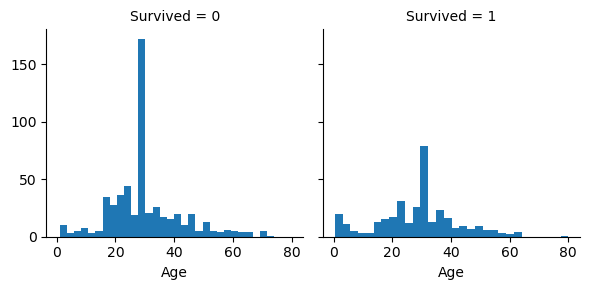

In [41]:
#Constructing two side-by-side histograms that illustrate the number of people who survived and the number of people who died according to their age

num_of_survived_and_dead_passengers_by_age = sns.FacetGrid(data, col = 'Survived')
num_of_survived_and_dead_passengers_by_age.map(plt.hist, 'Age', bins = 30)

In [42]:
'''Since we have already dealt with the missing age values, we can create an attribute (column) called 'AgeRange' to categorize passengers based 
   on their specified age using 5 intervals'''

def age_range(age): 
    if age > 0 and age <= 13: 
        return "Child"
    elif age > 13 and age <= 18: 
        return "Teenager"
    elif age > 18 and age <= 30: 
        return "Young Adult"
    elif age > 40 and age <= 59: 
        return "Old Man" 
    else: 
        return 'Adult'

In [43]:
#Adding the newly created attribute 'Age_range' to our dataset

data['AgeRange'] = data['Age'].apply(age_range)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Young Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult


In [44]:
#Determining the total number of passengers belonging in each age range category

age_range_categories = data.groupby('AgeRange')
total_passengers_in_age_range_categories = age_range_categories['Survived'].count()
total_passengers_in_age_range_categories

AgeRange
Adult          181
Child           71
Old Man        124
Teenager        68
Young Adult    447
Name: Survived, dtype: int64

In [45]:
#Getting the number of passengers who survived and the number of passengers who died in each age range category

age_range_categories['Survived'].value_counts()

AgeRange     Survived
Adult        0           105
             1            76
Child        1            42
             0            29
Old Man      0            76
             1            48
Teenager     0            40
             1            28
Young Adult  0           299
             1           148
Name: count, dtype: int64

In [46]:
#Counting the number of passengers who survived in each age range category

data[data['Survived']==1].groupby('AgeRange').count()['Survived']

AgeRange
Adult           76
Child           42
Old Man         48
Teenager        28
Young Adult    148
Name: Survived, dtype: int64

In [47]:
#Calculating the average number of passengers who survived and the average number of passengers who died in each age range category

avg_of_survived_and_dead_passengers_in_age_range_categories = age_range_categories['Survived'].value_counts() / total_passengers_in_age_range_categories
round(avg_of_survived_and_dead_passengers_in_age_range_categories * 100, 3)

AgeRange     Survived
Adult        0           58.011
             1           41.989
Child        1           59.155
             0           40.845
Old Man      0           61.290
             1           38.710
Teenager     0           58.824
             1           41.176
Young Adult  0           66.890
             1           33.110
dtype: float64

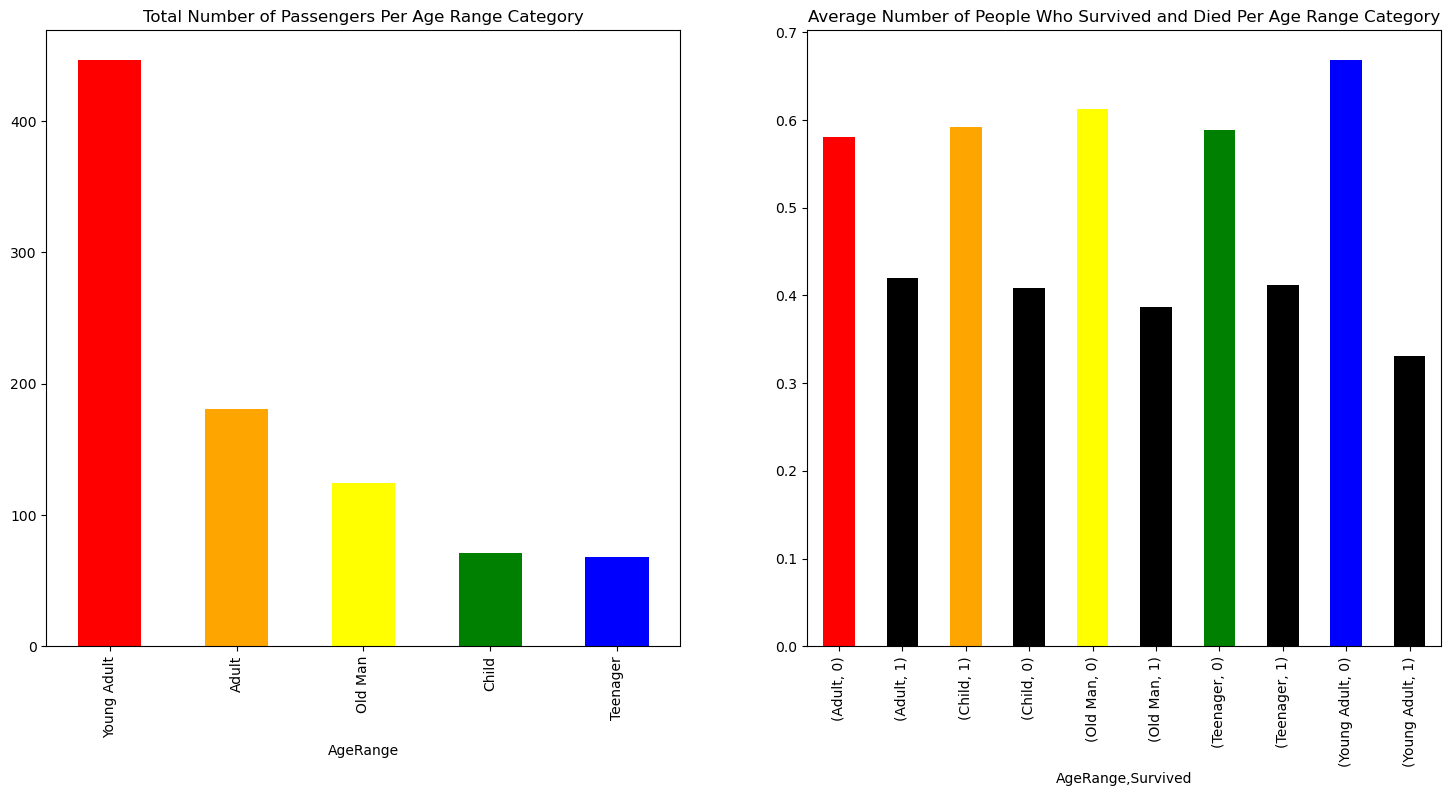

In [48]:
'''Developing two side-by-side barcharts to illustrate the total number of passengers in each age range category + the average number of people who 
   survived and the average number of people who died in each age range category'''

f, ax = plt.subplots(1,2,figsize=(18,8))
data['AgeRange'].value_counts().plot.bar(color=['red','orange','yellow','green','blue'],ax = ax[0])
ax[0].set_title('Total Number of Passengers Per Age Range Category')

avg_of_survived_and_dead_passengers_in_age_range_categories.plot.bar(color=['red','black','orange','black','yellow','black','green','black','blue' ,'black'],ax = ax[1])
ax[1].set_title('Average Number of People Who Survived and Died Per Age Range Category')

plt.show()

In [49]:
'''We will import the 're' (regular expression) library to allow us to search for specified patters within a string and extract the name title of each 
   passenger. Then, we will create a new attribute called 'NameTitle' to store each passenger's name title in our dataset''' 

import re

def get_name_title(name):
    name_title_search = re.search(' ([A-Za-z]+)\.', name)
    if name_title_search:
        return name_title_search.group(1)
    return ""

data['NameTitle'] = data['Name'].apply(get_name_title)

In [50]:
#Identifying the unique name titles in our dataset

unique_name_titles = data['NameTitle'].unique()
unique_name_titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [51]:
#Creating a copy of the 'Age' attribute and naming it 'New_Age'

data['NewAge'] = data['Age']

In [52]:
#Looping through the unique name titles and calculating the average number of occurences for each name title

for name_title in unique_name_titles:   
    avg_of_name_titles = data[data['NameTitle'] == name_title]
    print(f" The average number of occurences of the title '{name_title}' is  : {round(avg_of_name_titles['NewAge'].mean(), 3)}")

 The average number of occurences of the title 'Mr' is  : 31.823
 The average number of occurences of the title 'Mrs' is  : 35.096
 The average number of occurences of the title 'Miss' is  : 23.401
 The average number of occurences of the title 'Master' is  : 7.117
 The average number of occurences of the title 'Don' is  : 40.0
 The average number of occurences of the title 'Rev' is  : 43.167
 The average number of occurences of the title 'Dr' is  : 40.286
 The average number of occurences of the title 'Mme' is  : 24.0
 The average number of occurences of the title 'Ms' is  : 28.0
 The average number of occurences of the title 'Major' is  : 48.5
 The average number of occurences of the title 'Lady' is  : 48.0
 The average number of occurences of the title 'Sir' is  : 49.0
 The average number of occurences of the title 'Mlle' is  : 24.0
 The average number of occurences of the title 'Col' is  : 58.0
 The average number of occurences of the title 'Capt' is  : 70.0
 The average number of 

In [53]:
#Creating the attribute 'NewAgeRange' that will bin the 'AgeRange' values into discrete intervals and alter it from continuous to categorical.

data['NewAgeRange'] = pd.cut(data['NewAge'], 5)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeRange,NameTitle,NewAge,NewAgeRange
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Young Adult,Mr,22.0,"(16.336, 32.252]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,Mrs,38.0,"(32.252, 48.168]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,Miss,26.0,"(16.336, 32.252]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult,Mrs,35.0,"(32.252, 48.168]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult,Mr,35.0,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Young Adult,Rev,27.0,"(16.336, 32.252]"
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Young Adult,Miss,19.0,"(16.336, 32.252]"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,23.4500,S,Young Adult,Miss,30.0,"(16.336, 32.252]"


In [54]:
#Calculating the survival rate of passengers in each age range interval

round(data[data['Survived']==1].groupby('NewAgeRange').count()['Survived'] / data.groupby('NewAgeRange').count()['Survived'], 3)

/var/folders/53/b7ck4fyj553765ldfwzbw9lr0000gn/T/ipykernel_1139/2256485913.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  round(data[data['Survived']==1].groupby('NewAgeRange').count()['Survived'] / data.groupby('NewAgeRange').count()['Survived'], 3)
/var/folders/53/b7ck4fyj553765ldfwzbw9lr0000gn/T/ipykernel_1139/2256485913.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  round(data[data['Survived']==1].groupby('NewAgeRange').count()['Survived'] / data.groupby('NewAgeRange').count()['Survived'], 3)


NewAgeRange
(0.34, 16.336]      0.550
(16.336, 32.252]    0.344
(32.252, 48.168]    0.404
(48.168, 64.084]    0.435
(64.084, 80.0]      0.091
Name: Survived, dtype: float64

In [55]:
#Identifying the total number of passengers in each age range interval

data["NewAgeRange"].value_counts() 

NewAgeRange
(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: count, dtype: int64

In [56]:
#Deteriming the number of passengers who survived in each age range interval

data[data['Survived']==1].groupby('NewAgeRange').count()['Survived']

/var/folders/53/b7ck4fyj553765ldfwzbw9lr0000gn/T/ipykernel_1139/516059809.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[data['Survived']==1].groupby('NewAgeRange').count()['Survived']


NewAgeRange
(0.34, 16.336]       55
(16.336, 32.252]    180
(32.252, 48.168]     76
(48.168, 64.084]     30
(64.084, 80.0]        1
Name: Survived, dtype: int64

In [57]:
#Counting the number of passengers who have no siblings/spouses or a specific number of siblings/spouses

num_of_siblings_or_spouses = data.groupby('SibSp')
num_of_siblings_or_spouses['Survived'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

In [58]:
# Getting the number of passengers who survived and the number of dead passengers who have no siblings/spouses or a specific number of siblings/spouses
num_of_siblings_or_spouses['Survived'].value_counts(sort=False)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

In [59]:
#Counting the number of passengers who have no parents/children or a specific number of parents/children

num_of_parents_or_children = data.groupby('Parch')
num_of_parents_or_children['Survived'].count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

In [60]:
# Counting the number of people who survived and the number of people who died for the passengers that had siblings/spouses 

passengers_having_siblings_or_spouses = data.loc[data['SibSp'] > 0].Survived.value_counts(ascending=True)
passengers_having_siblings_or_spouses

Survived
1    132
0    151
Name: count, dtype: int64

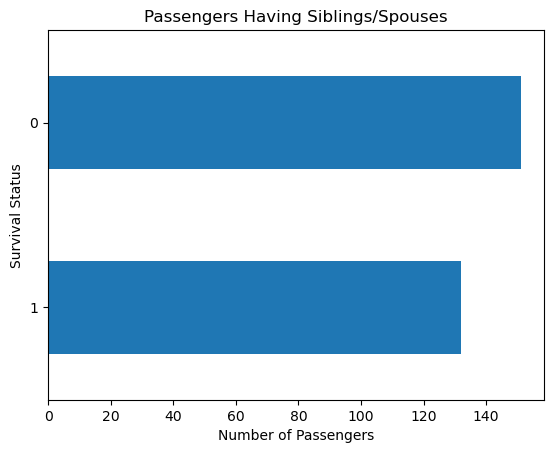

In [61]:
#Constructing a barchart to visualize the number of people who survived and the number of people who died for the passengers that had siblings/spouses 

passengers_having_siblings_or_spouses_barchart = passengers_having_siblings_or_spouses.plot(xlabel = "Number of Passengers", ylabel='Survival Status', kind='barh', title='Passengers Having Siblings/Spouses')

In [62]:
## Counting the number of people who survived and the number of people who died for the passengers that had parents/children

passengers_having_parents_or_children = data.loc[data['Parch'] > 0]['Survived'].value_counts(ascending=True)
passengers_having_parents_or_children

Survived
0    104
1    109
Name: count, dtype: int64

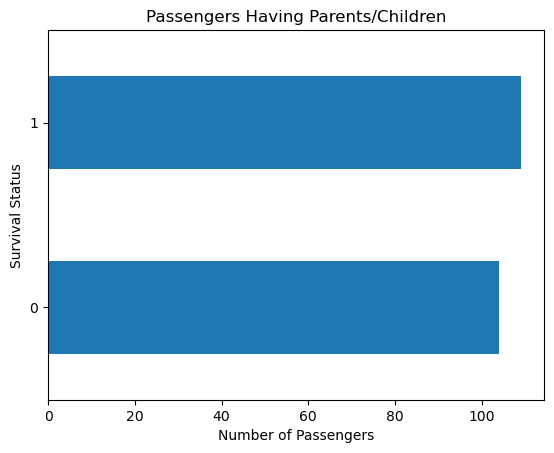

In [63]:
#Constructing a barchart to visualize the number of people who survived and the number of people who died for the passengers that had parents/children 

passengers_having_parents_or_children_barchart = passengers_having_parents_or_children.plot(xlabel = "Number of Passengers", ylabel='Survival Status', kind='barh', title='Passengers Having Parents/Children')

In [64]:
#Identifying the number of female passengers who did have siblings/spouses + percentage of survived and dead female passengers having siblings/spouses

females_having_siblings_spouses = (data['Sex'] == 'female') & (data['SibSp'] > 0)
num_of_survived_dead_females_having_siblings_spouses = data.loc[females_having_siblings_spouses]['Survived'].count()
print('Number of female passengers who had siblings/spouses:', num_of_survived_dead_females_having_siblings_spouses)
print('Percentage of survived and dead female passengers having siblings/spouses:', round(data.loc[females_having_siblings_spouses]['Survived'].value_counts() / num_of_survived_dead_females_having_siblings_spouses * 100, 3))


Number of female passengers who had siblings/spouses: 140
Percentage of survived and dead female passengers having siblings/spouses: Survived
1    68.571
0    31.429
Name: count, dtype: float64


In [65]:
#Identifying the number of male passengers who did have siblings/spouses + percentage of survived and dead male passengers having siblings/spouses

males_having_siblings_spouses = (data['Sex'] == 'male') & (data['SibSp'] > 0)
num_of_survived_dead_males_having_siblings_spouses = data.loc[males_having_siblings_spouses]['Survived'].count()
print('Number of male passengers who had siblings/spouses:', num_of_survived_dead_males_having_siblings_spouses)
print('Percentage of survived and dead male passengers having siblings/spouses:', round(data.loc[males_having_siblings_spouses]['Survived'].value_counts() / num_of_survived_dead_males_having_siblings_spouses * 100, 3))

Number of male passengers who had siblings/spouses: 143
Percentage of survived and dead male passengers having siblings/spouses: Survived
0    74.825
1    25.175
Name: count, dtype: float64


## Q2:

**Attributes Used In Our Analysis:**

'Age' , 'Sex' , 'Pclass', SibSp, Parch.

1- 'Age': shows us how many elders, young, adults have survived based on their age. As we can see from our data, the age on the Titanic was distributed properly, therefore it is expected to have an impact on the survivors and their ages.

2- 'Pclass': Shows us how many passengers have survived based on the three classes and which class had the highest possibility of surviving and that depending on its location on the ship. This characteristic specifies the class of each passenger, which is important to see its relation with the survived passengers because the class had an impact on the surviving number.

3- 'Sex': Shows us which gender had the highest possibility of surviving based on two choices: 'Male' or 'female'. Genders played a big role in our analysis because the number of dead males was larger than the survived males and the number of survived females was higher than the dead females so we can conculode from that females had higher chance of surviving than males.

4- 'SibSp' & 'Parch': The information in both columns greatly impacted our analysis since those who had familes had to save them which may have contributed to more deaths.


**Important Remarks:**

- The only columns that contains Null values are Age, Cabin, and Embarked.We can remove the data that isn't relevant from the dataframe.


- The Name, Ticket Number, Fare, and Cabin Attributes does not have any relation with our Survived column and not useful for us. And thats why I dropped the Cabin column because most of it was Null values and it wasn't helping in our analysis.

- The boarding port can have an impact on the survaival rate because it has to do with the passengers' location aboard the ship. The name title can be used to predict the age group, we'll keep it.

**Therefore, after conducting an extremely thorough and deep analysis of the dataset, we can safely conclude that passengers that did not have family members onboard (children, parents, spouses, slibings) had a better chance of surviving the Titanic tragedy than others.**

## Q3:

**After our previous explanation of our dataset analysis and findings, we will now construct the box plot of the 'Fare' and 'Pclass' columns:**

In [66]:
#First of all, we will show the describtion of the 'Fare' column grouped by the 'Pclass' column

fare_description = data.groupby('Pclass')
fare_description['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


**Before creating our box plot, we need to remove any outliers from the 'Fare' column:**

In [67]:
# Calculating the maximum fare value

max_fare = data.loc[data['Fare'] < data['Fare'].max()]['Fare'].max()

In [68]:
data['Fare'] = data['Fare'].apply(lambda x: max_fare if x > max_fare else x)
data['Fare'].max()

263.0

/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/almabroukbenomran/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: xlabel='Pclass', ylabel='Fare'>

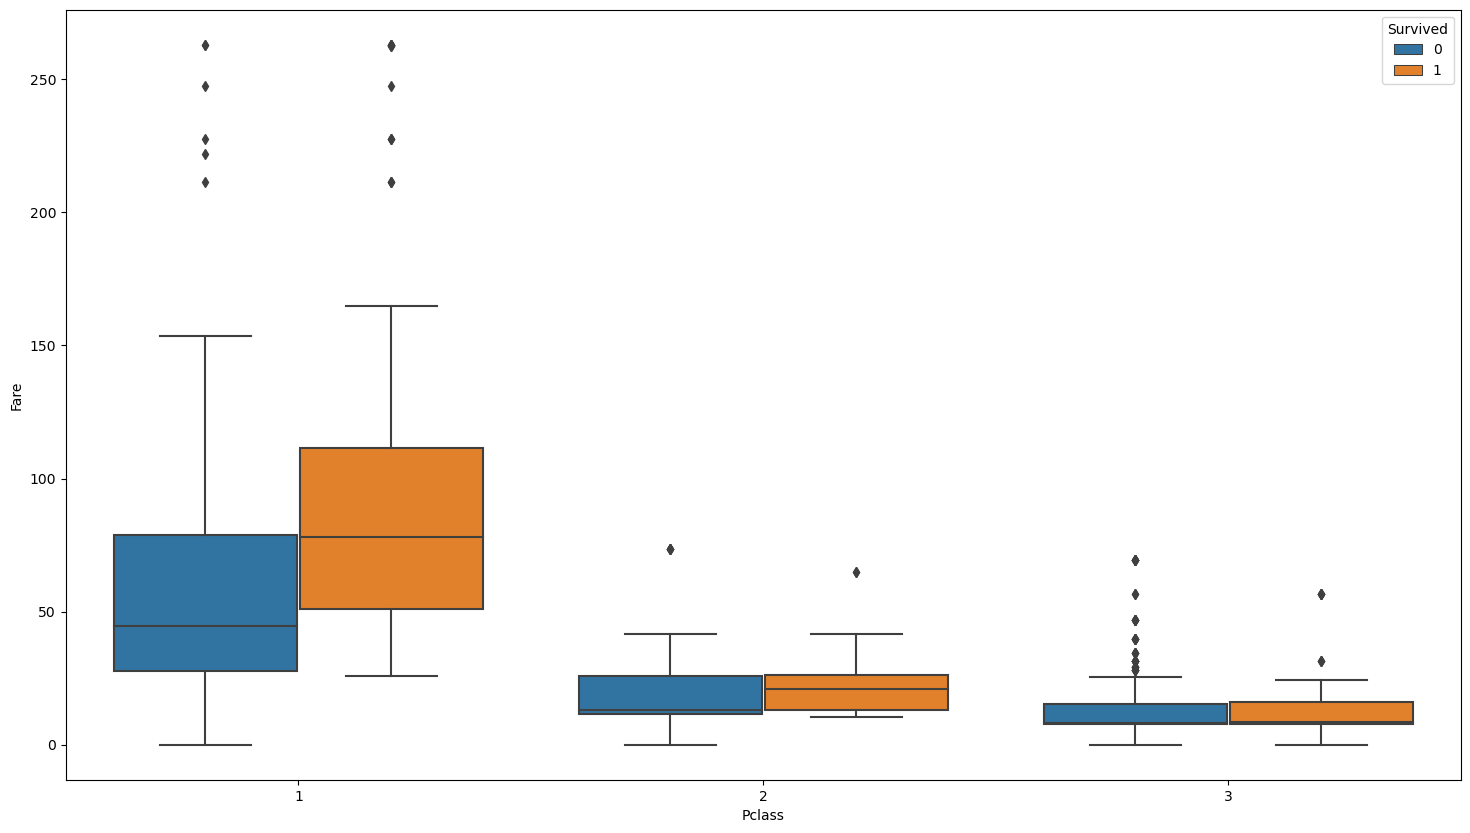

In [69]:
'''Creating the boxplot that compares the passengers who survived and the passengers who died in first, second, and third class with the fare amount'''

plt.figure(figsize=(18, 10))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data)

## Q4:

**The following attributes were built to better assist us with analysing our dataset:**

- The first attribute is 'AgeRange' which we used to categorize the age data as a categorical data. Also, it enabled us to clarify which age classification had the highest survival rate.

- The Second attribute is called 'NameTitle' to extract the titles that were used to address the passengers on the Titanic.


**Note: The attributes 'Name', 'Ticket', 'Cabin' and 'Embarked' were not utilized in our data analysis since they did not impact the 'Survived' attribute and were therefore of no use to us.**

## Q5:

**In terms of the 'Age' attribute, we replaced all 177 missing values in this column with the mean value which was 30. As discussed before, because this is a vital attribute, we couldn't delete them all as it would have affected our analysis results badly.**

In [70]:
# Printing the percentage of missing values for each attribute

print('Percentage of missing values for each attribute: \n\n', round(data.isnull().sum().sort_values(ascending=False) / len(data) * 100, 3))

Percentage of missing values for each attribute: 

 Embarked       0.224
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age            0.000
SibSp          0.000
Parch          0.000
Fare           0.000
AgeRange       0.000
NameTitle      0.000
NewAge         0.000
NewAgeRange    0.000
dtype: float64


In [71]:
display(data[data.Embarked.isnull()])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeRange,NameTitle,NewAge,NewAgeRange
PassengerId,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN,Adult,Miss,38.0,"(32.252, 48.168]"
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN,Adult,Mrs,62.0,"(48.168, 64.084]"


In [72]:
# Finally, due to the 'Embarked' column having zero significance to our data analysis, we dropped it

data = data.drop(['Embarked'], axis= 1)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,AgeRange,NameTitle,NewAge,NewAgeRange
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Young Adult,Mr,22.0,"(16.336, 32.252]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Adult,Mrs,38.0,"(32.252, 48.168]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Young Adult,Miss,26.0,"(16.336, 32.252]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Adult,Mrs,35.0,"(32.252, 48.168]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Adult,Mr,35.0,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,Young Adult,Rev,27.0,"(16.336, 32.252]"
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,Young Adult,Miss,19.0,"(16.336, 32.252]"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,23.4500,Young Adult,Miss,30.0,"(16.336, 32.252]"


In [74]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,AgeRange,NameTitle,NewAge,NewAgeRange
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Young Adult,Mr,22.0,"(16.336, 32.252]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Adult,Mrs,38.0,"(32.252, 48.168]"
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Young Adult,Miss,26.0,"(16.336, 32.252]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Adult,Mrs,35.0,"(32.252, 48.168]"
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Adult,Mr,35.0,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,Young Adult,Rev,27.0,"(16.336, 32.252]"
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,Young Adult,Miss,19.0,"(16.336, 32.252]"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,23.4500,Young Adult,Miss,30.0,"(16.336, 32.252]"


In [76]:
data.to_csv('cleaned_data.csv')